# heart disease detection 

In [1]:
import pandas as pd
#read data
df=pd.read_csv("heartdiseasedataset.csv")
df.head()

,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluro,thallium,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


# data exploration 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      270 non-null    int64  
 1   sex                      270 non-null    int64  
 2   chest_pain_type          270 non-null    int64  
 3   bp                       270 non-null    int64  
 4   cholesterol              270 non-null    int64  
 5   fbs_over_120             270 non-null    int64  
 6   ekg_results              270 non-null    int64  
 7   max_hr                   270 non-null    int64  
 8   exercise_angina          270 non-null    int64  
 9   st_depression            270 non-null    float64
 10  slope_of_st              270 non-null    int64  
 11  number_of_vessels_fluro  270 non-null    int64  
 12  thallium                 270 non-null    int64  
 13  heart_disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [3]:
df.shape


(270, 14)

# count presence or absence of heart disease

Absence     150
Presence    120
Name: heart_disease, dtype: int64


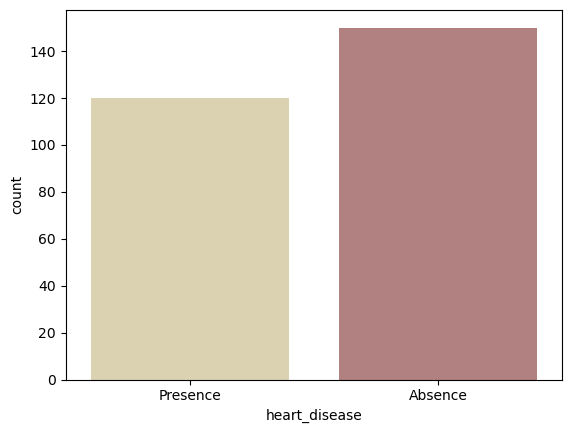

In [4]:
print(df.heart_disease.value_counts())
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="heart_disease", data=df, palette="pink_r")
plt.show()

# calculating missing values

In [5]:
df.isna().sum()

age                        0
sex                        0
chest_pain_type            0
bp                         0
cholesterol                0
fbs_over_120               0
ekg_results                0
max_hr                     0
exercise_angina            0
st_depression              0
slope_of_st                0
number_of_vessels_fluro    0
thallium                   0
heart_disease              0
dtype: int64

#  heart disease by sex

Percentage of Patients Haven't Heart Disease: 55.56%
Percentage of Patients Have Heart Disease: 44.44%


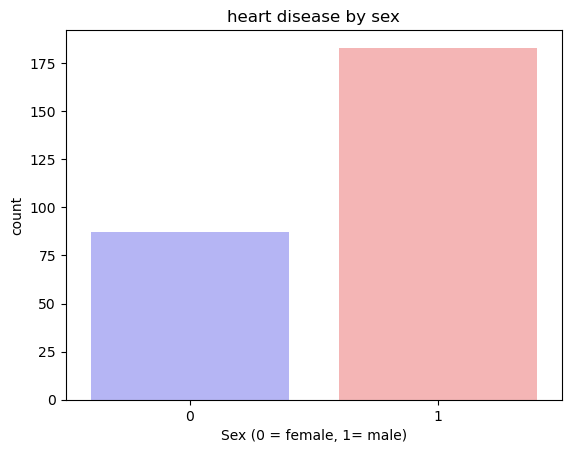

In [6]:
countNoDisease = len(df[df.heart_disease == 'Absence'])
countHaveDisease = len(df[df.heart_disease == 'Presence'])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.heart_disease))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.heart_disease))*100)))
sns.countplot(x='sex', data=df, palette="bwr")
plt.xlabel("Sex (0 = female, 1= male)")
plt.title("heart disease by sex")
plt.show()

In [7]:
#calculating percentage of heart disease in male or female 
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 32.22%
Percentage of Male Patients: 67.78%


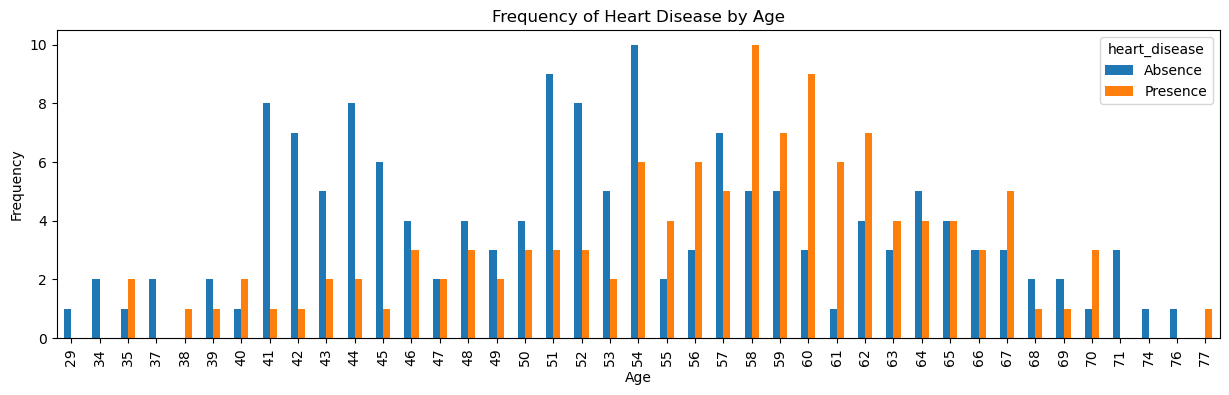

In [8]:
#calculating heart disease by age
df.groupby('heart_disease').mean()
pd.crosstab(df.age,df.heart_disease).plot(kind="bar",figsize=(15,4))
plt.title('Frequency of Heart Disease by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

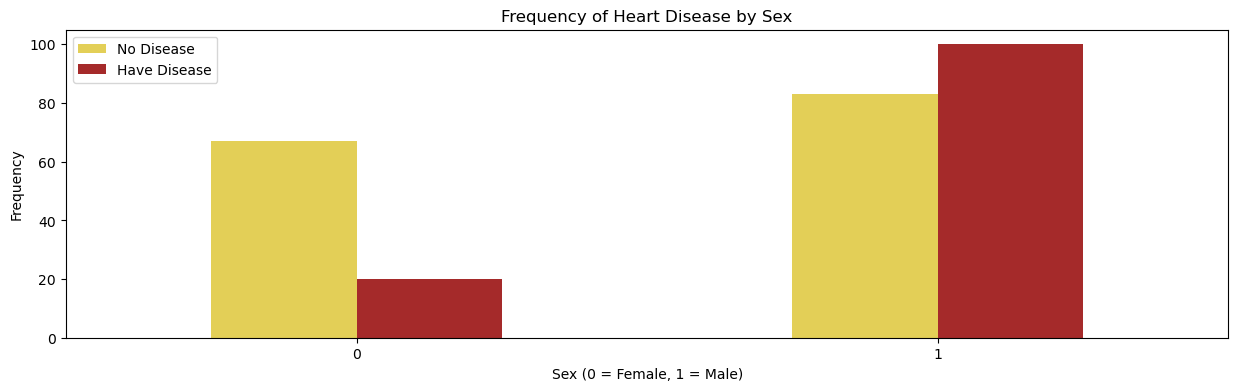

In [9]:
#calculate frequency of heart disease by sex
pd.crosstab(df.sex,df.heart_disease).plot(kind="bar",figsize=(15,4),color=['#E3CF57', "#A52A2A" ])
plt.title('Frequency of Heart Disease by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

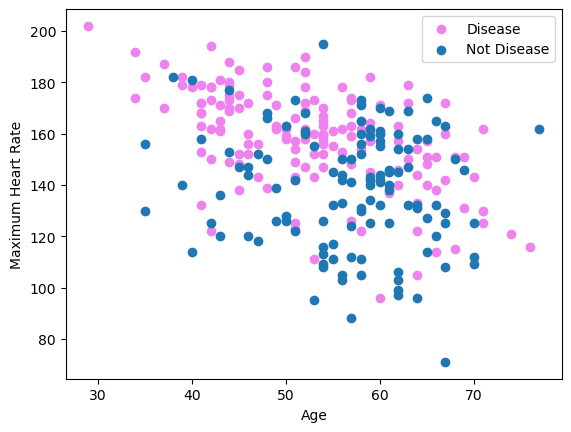

In [10]:
#calculate frequency of heart disease by Maximum heart rate
plt.scatter(x=df.age[df.heart_disease=="Absence"], y=df.max_hr[(df.heart_disease=="Absence")], c="violet")
plt.scatter(x=df.age[df.heart_disease=="Presence"], y=df.max_hr[(df.heart_disease=="Presence")])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

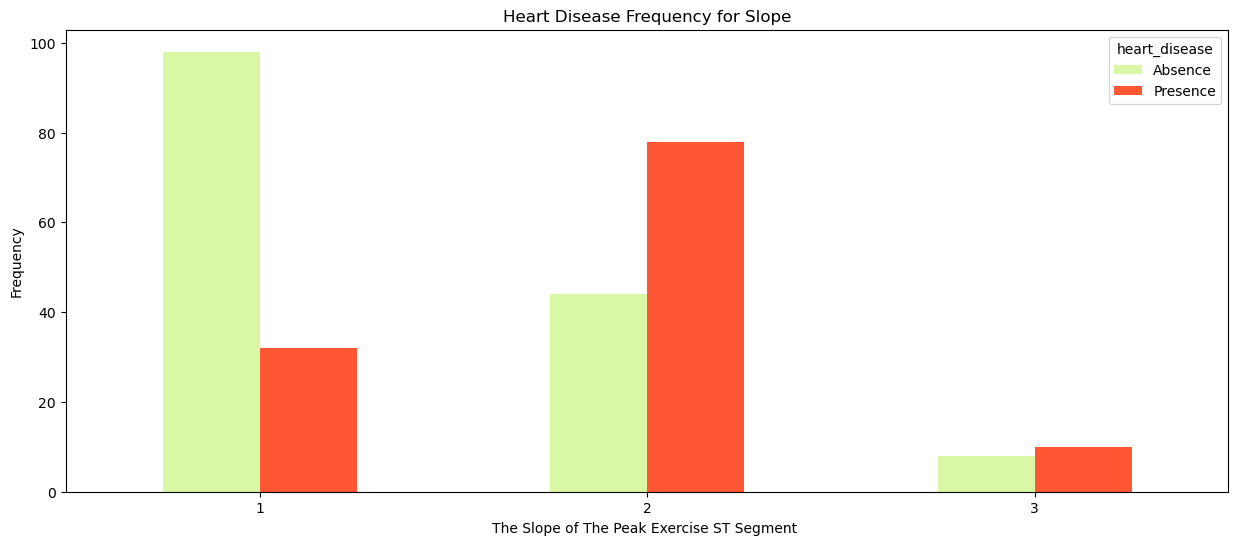

In [11]:
#calculating slope of ST segment 
pd.crosstab(df.slope_of_st,df.heart_disease).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

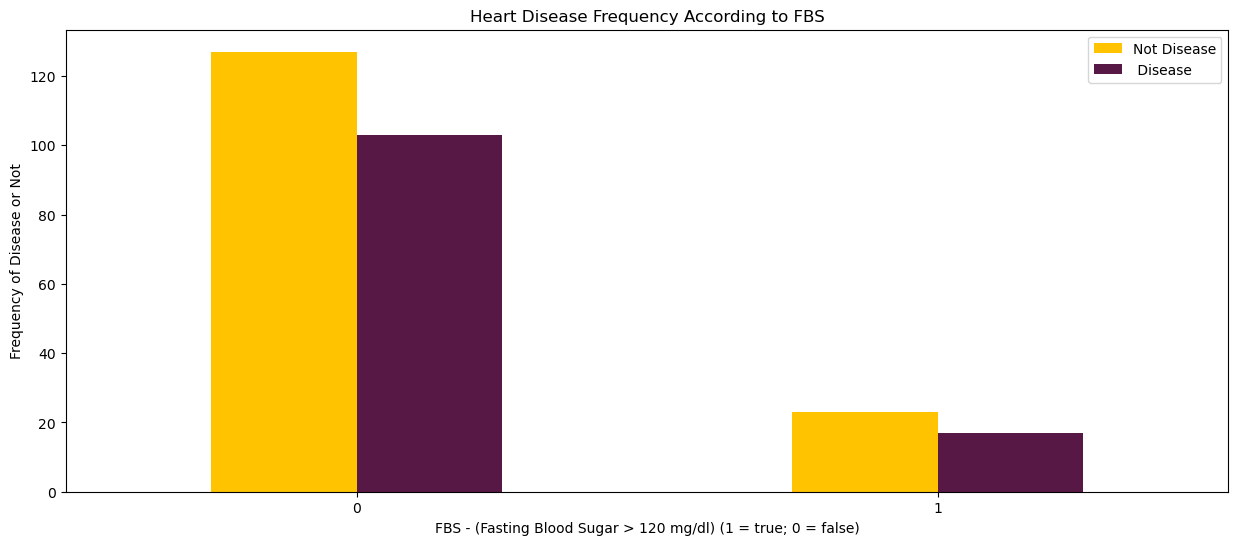

In [12]:
#calculate heart disease frequency according to fbs
pd.crosstab(df.fbs_over_120,df.heart_disease).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According to FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Not Disease", " Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

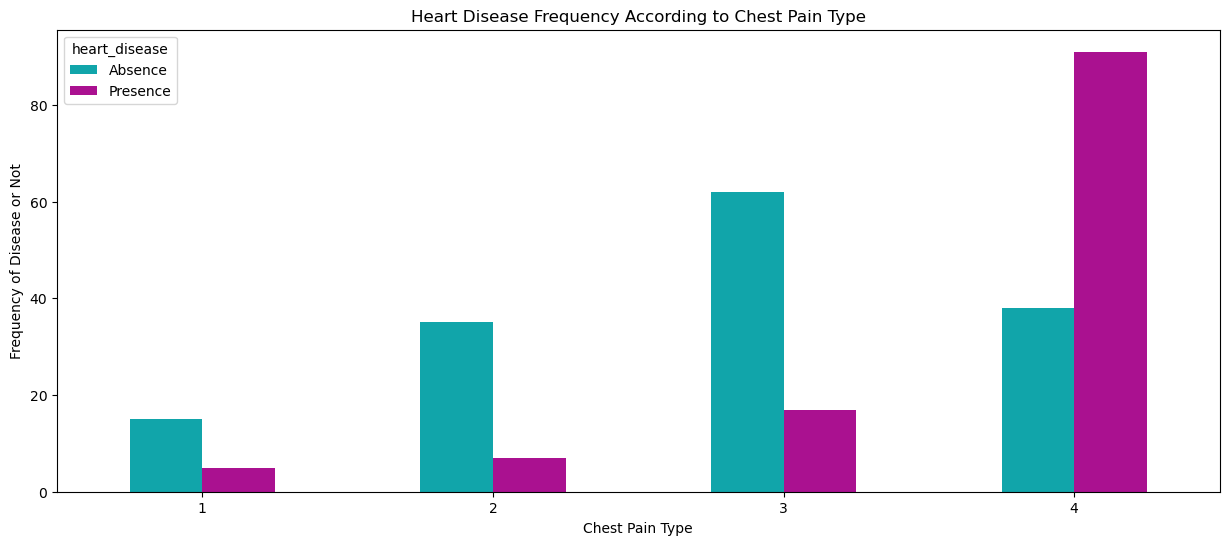

In [13]:
#calculate heart disease frequency according to chest pain
pd.crosstab(df.chest_pain_type,df.heart_disease).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

# creating Dummy variables 


In [14]:
a = pd.get_dummies(df['chest_pain_type'], prefix = "chest_pain_type")
b = pd.get_dummies(df['thallium'], prefix = "thallium")
c = pd.get_dummies(df['slope_of_st'], prefix = "slope_of_st")
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
print(df.head())

   age  sex  chest_pain_type   bp  cholesterol  fbs_over_120  ekg_results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   max_hr  exercise_angina  st_depression  ...  chest_pain_type_1  \
0     109                0            2.4  ...                  0   
1     160                0            1.6  ...                  0   
2     141                0            0.3  ...                  0   
3     105                1            0.2  ...                  0   
4     121                1            0.2  ...                  0   

   chest_pain_type_2  chest_pain_type_3 chest_pain_type_4  thallium_3  \
0                  0                  0          

In [15]:
df = df.drop(columns = ['chest_pain_type', 'thallium', 'slope_of_st'])
print(df.head())

   age  sex   bp  cholesterol  fbs_over_120  ekg_results  max_hr  \
0   70    1  130          322             0            2     109   
1   67    0  115          564             0            2     160   
2   57    1  124          261             0            0     141   
3   64    1  128          263             0            0     105   
4   74    0  120          269             0            2     121   

   exercise_angina  st_depression  number_of_vessels_fluro  ...  \
0                0            2.4                        3  ...   
1                0            1.6                        0  ...   
2                0            0.3                        0  ...   
3                1            0.2                        1  ...   
4                1            0.2                        1  ...   

  chest_pain_type_1  chest_pain_type_2  chest_pain_type_3  chest_pain_type_4  \
0                 0                  0                  0                  1   
1                 0         

# #FINDING CORRELATION BETWEEN EACH COLUMNS BY USING HEATMAP

C:\Users\nehaa\AppData\Local\Temp\ipykernel_5280\73796859.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


(20.5, -0.5)

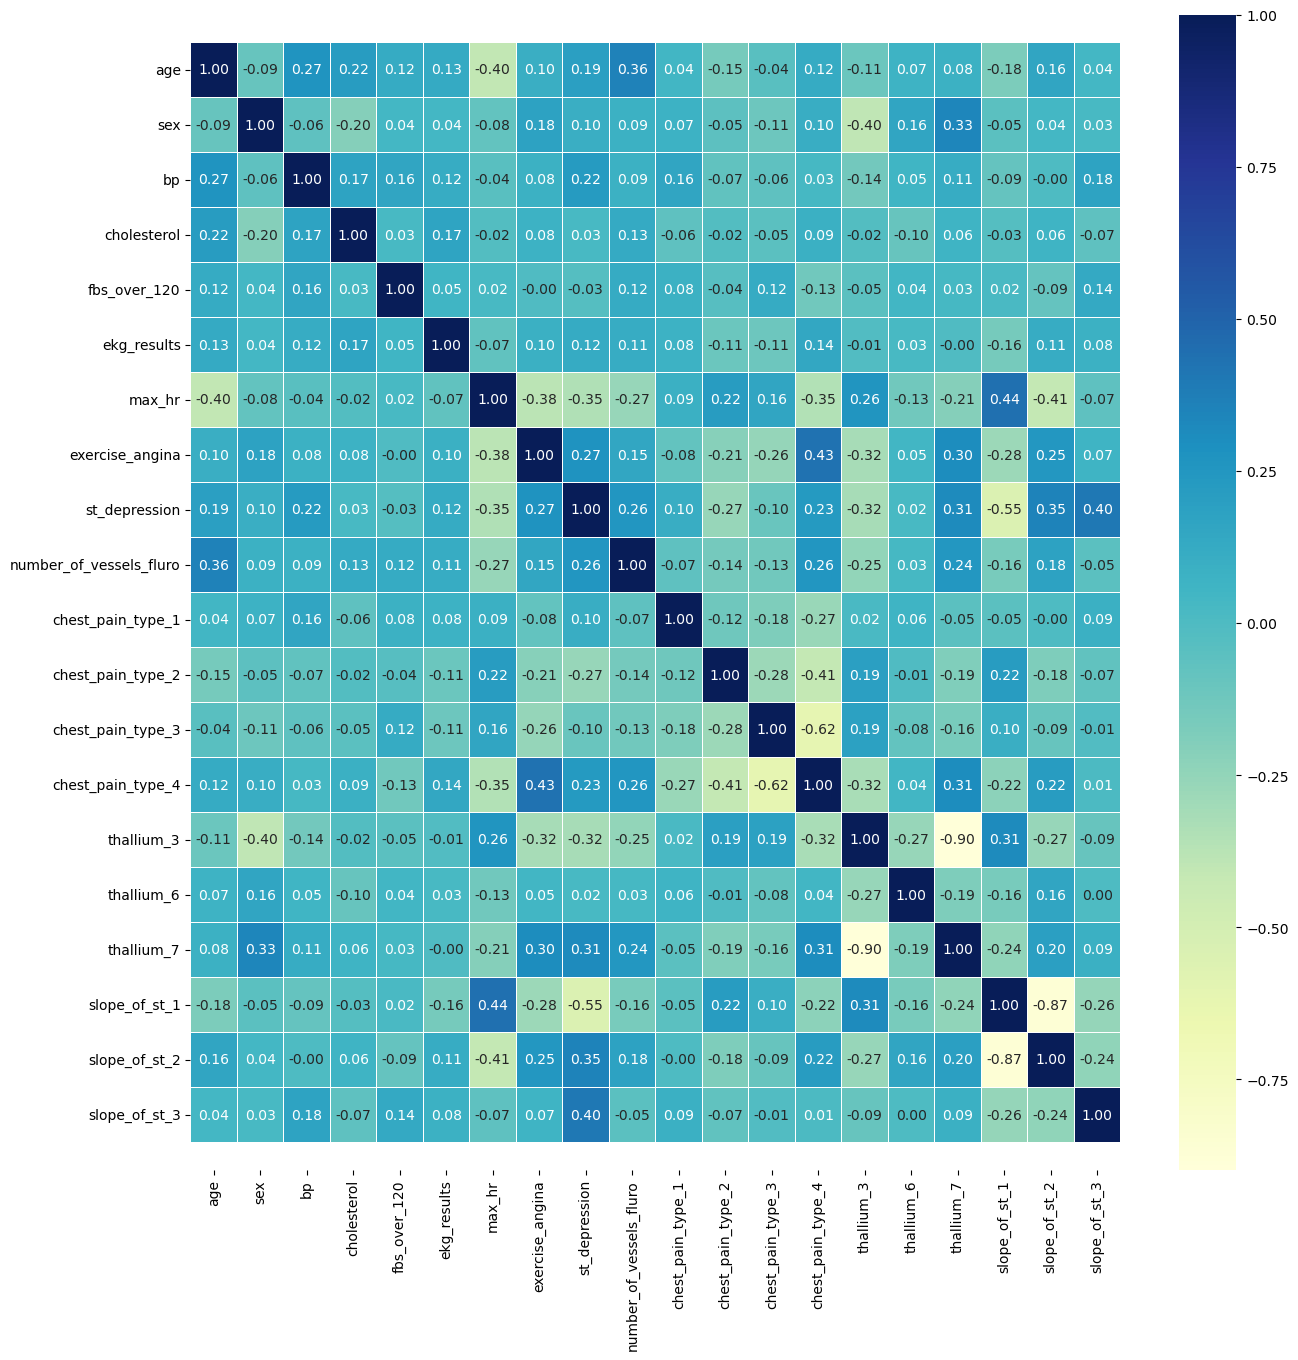

In [16]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# model building 

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop('heart_disease', axis=1)
y = df.heart_disease

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# apply classifier 


# logistic regression 

In [19]:
 
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

Train Result:
Accuracy Score: 87.83%
_______________________________________________
CLASSIFICATION REPORT:
              Absence   Presence  accuracy   macro avg  weighted avg
precision    0.867925   0.891566  0.878307    0.879745      0.878932
recall       0.910891   0.840909  0.878307    0.875900      0.878307
f1-score     0.888889   0.865497  0.878307    0.877193      0.877997
support    101.000000  88.000000  0.878307  189.000000    189.000000
_______________________________________________
Confusion Matrix: 
 [[92  9]
 [14 74]]

Test Result:
Accuracy Score: 86.42%
_______________________________________________
CLASSIFICATION REPORT:
             Absence   Presence  accuracy  macro avg  weighted avg
precision   0.827586   0.956522  0.864198   0.892054      0.878524
recall      0.979592   0.687500  0.864198   0.833546      0.864198
f1-score    0.897196   0.800000  0.864198   0.848598      0.858798
support    49.000000  32.000000  0.864198  81.000000     81.000000
_________________

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.830688,86.419753


# K-nearest neighbors 

In [20]:

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Train Result:
Accuracy Score: 78.31%
_______________________________________________
CLASSIFICATION REPORT:
              Absence   Presence  accuracy   macro avg  weighted avg
precision    0.767857   0.805195  0.783069    0.786526      0.785242
recall       0.851485   0.704545  0.783069    0.778015      0.783069
f1-score     0.807512   0.751515  0.783069    0.779513      0.781439
support    101.000000  88.000000  0.783069  189.000000    189.000000
_______________________________________________
Confusion Matrix: 
 [[86 15]
 [26 62]]

Test Result:
Accuracy Score: 61.73%
_______________________________________________
CLASSIFICATION REPORT:
             Absence   Presence  accuracy  macro avg  weighted avg
precision   0.687500   0.515152  0.617284   0.601326      0.619412
recall      0.673469   0.531250  0.617284   0.602360      0.617284
f1-score    0.680412   0.523077  0.617284   0.601745      0.618255
support    49.000000  32.000000  0.617284  81.000000     81.000000
_________________

C:\Users\nehaa\AppData\Local\Temp\ipykernel_5280\1096841216.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.830688,86.419753
1,K-nearest neighbors,78.306878,61.728395


# decision tree 

In [21]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df


Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
           Absence  Presence  accuracy  macro avg  weighted avg
precision      1.0       1.0       1.0        1.0           1.0
recall         1.0       1.0       1.0        1.0           1.0
f1-score       1.0       1.0       1.0        1.0           1.0
support      101.0      88.0       1.0      189.0         189.0
_______________________________________________
Confusion Matrix: 
 [[101   0]
 [  0  88]]

Test Result:
Accuracy Score: 74.07%
_______________________________________________
CLASSIFICATION REPORT:
             Absence   Presence  accuracy  macro avg  weighted avg
precision   0.759259   0.703704  0.740741   0.731481      0.737311
recall      0.836735   0.593750  0.740741   0.715242      0.740741
f1-score    0.796117   0.644068  0.740741   0.720092      0.736048
support    49.000000  32.000000  0.740741  81.000000     81.000000
_____________________________________

C:\Users\nehaa\AppData\Local\Temp\ipykernel_5280\434751287.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.830688,86.419753
1,K-nearest neighbors,78.306878,61.728395
2,Decision Tree Classifier,100.000000,74.074074


# Random forest classifier 

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
           Absence  Presence  accuracy  macro avg  weighted avg
precision      1.0       1.0       1.0        1.0           1.0
recall         1.0       1.0       1.0        1.0           1.0
f1-score       1.0       1.0       1.0        1.0           1.0
support      101.0      88.0       1.0      189.0         189.0
_______________________________________________
Confusion Matrix: 
 [[101   0]
 [  0  88]]

Test Result:
Accuracy Score: 81.48%
_______________________________________________
CLASSIFICATION REPORT:
             Absence   Presence  accuracy  macro avg  weighted avg
precision   0.793103   0.869565  0.814815   0.831334      0.823311
recall      0.938776   0.625000  0.814815   0.781888      0.814815
f1-score    0.859813   0.727273  0.814815   0.793543      0.807451
support    49.000000  32.000000  0.814815  81.000000     81.000000
_____________________________________

C:\Users\nehaa\AppData\Local\Temp\ipykernel_5280\4219320803.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,87.830688,86.419753
1,K-nearest neighbors,78.306878,61.728395
2,Decision Tree Classifier,100.000000,74.074074
3,Random Forest Classifier,100.000000,81.481481


# Support vector machine 

In [23]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
print_score(svm, X_train, y_train, X_test, y_test, train=True)
print_score(svm, X_train, y_train, X_test, y_test, train=False)

test_score = accuracy_score(y_test, svm.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
print(results_df)

Train Result:
Accuracy Score: 69.84%
_______________________________________________
CLASSIFICATION REPORT:
              Absence   Presence  accuracy   macro avg  weighted avg
precision    0.669231   0.762712  0.698413    0.715971      0.712756
recall       0.861386   0.511364  0.698413    0.686375      0.698413
f1-score     0.753247   0.612245  0.698413    0.682746      0.687595
support    101.000000  88.000000  0.698413  189.000000    189.000000
_______________________________________________
Confusion Matrix: 
 [[87 14]
 [43 45]]

Test Result:
Accuracy Score: 62.96%
_______________________________________________
CLASSIFICATION REPORT:
             Absence   Presence  accuracy  macro avg  weighted avg
precision   0.661017   0.545455   0.62963   0.603236      0.615363
recall      0.795918   0.375000   0.62963   0.585459      0.629630
f1-score    0.722222   0.444444   0.62963   0.583333      0.612483
support    49.000000  32.000000   0.62963  81.000000     81.000000
_________________

C:\Users\nehaa\AppData\Local\Temp\ipykernel_5280\201315337.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)
